In [41]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
#importing the needed python libraries
import pandas as pd
import numpy as np


In [6]:
#reading the dataset by using the pandas
df=pd.read_csv("Number_of_orders.csv")
print("the dataset is:")
df

the dataset is:


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [7]:
    k=df.columns
print("The number of columns/features in the dataset:",len(k))
print("\nThe features are",k)
print("\nThe shape of the given Dataset is",df.shape)


The number of columns/features in the dataset: 10

The features are Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

The shape of the given Dataset is (188340, 10)


In [8]:
#here im droping the sales column because it not needed for us
df=df.drop("Sales",axis=1)
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70


In [9]:
#here im doing the data preprocessing things
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             188340 non-null  object
 1   Store_id       188340 non-null  int64 
 2   Store_Type     188340 non-null  object
 3   Location_Type  188340 non-null  object
 4   Region_Code    188340 non-null  object
 5   Date           188340 non-null  object
 6   Holiday        188340 non-null  int64 
 7   Discount       188340 non-null  object
 8   #Order         188340 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 12.9+ MB


In [10]:
df.isnull()#---- we calculate  the null values count in next section

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
188335,False,False,False,False,False,False,False,False,False
188336,False,False,False,False,False,False,False,False,False
188337,False,False,False,False,False,False,False,False,False
188338,False,False,False,False,False,False,False,False,False


In [11]:
#here we are checking any null values in the dataset
df.isnull().sum()  # no null values in the dataset

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
dtype: int64

In [12]:
df.describe()    #we observe that all the value have correct data values 
                 #our dataset is perfectly okay to move further

,Store_id,Holiday,#Order
count,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692
std,105.366308,0.338256,30.467415
min,1.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000
50%,183.000000,0.000000,63.000000
75%,274.000000,0.000000,82.000000
max,365.000000,1.000000,371.000000


In [42]:
#here we are seeing the number of orders form the each store_type in the pie chart by using the plotly library
!pip install plotly
import plotly.express as px



Text(0.5, 1.0, 'Location_type')

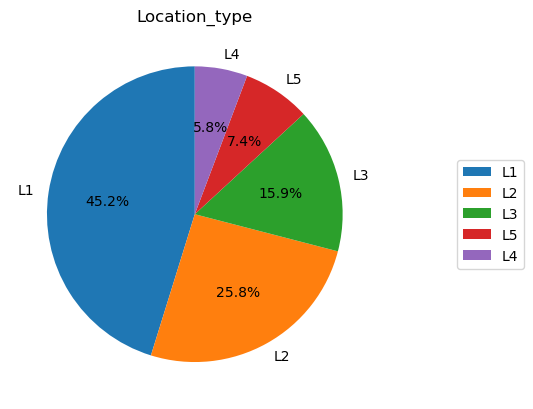

In [14]:
import matplotlib.pyplot as plt
# Data to plot
pie=df["Location_Type"].value_counts()
st=pie.index
order=pie.values 
fig, ax = plt.subplots()
ax.pie(order, labels=st, autopct='%1.1f%%', startangle=90)
# Add a legend
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))
# Add a title
ax.set_title("Location_type")
# Show plot
#plt.show()

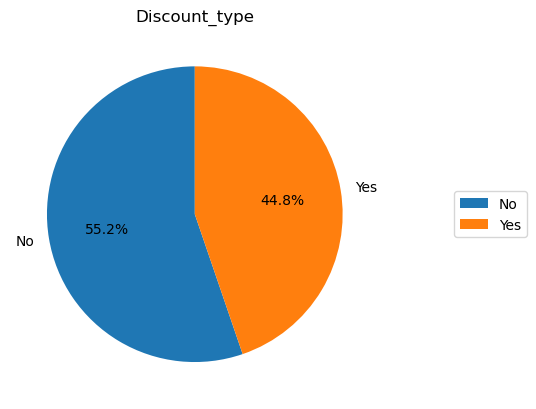

In [15]:
pie=df["Discount"].value_counts()
st1=pie.index
order1=pie.values 
fig, ax = plt.subplots()
ax.pie(order1, labels=st1, autopct='%1.1f%%', startangle=90)
# Add a legend
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))
# Add a title
ax.set_title("Discount_type")
# Show plot
plt.show()

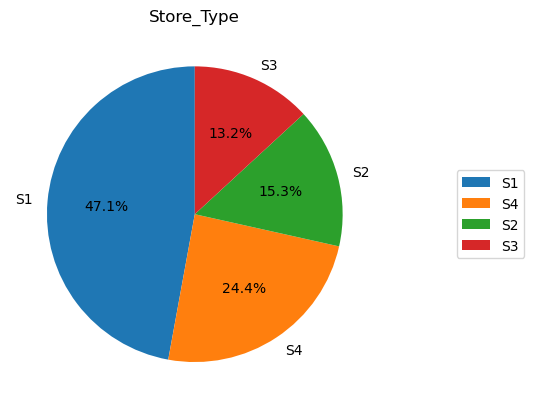

In [16]:
pie=df["Store_Type"].value_counts()
st2=pie.index
order2=pie.values 
fig, ax = plt.subplots()
ax.pie(order2, labels=st2, autopct='%1.1f%%', startangle=90)
# Add a legend
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))
# Add a title
ax.set_title("Store_Type")
# Show plot
plt.show()

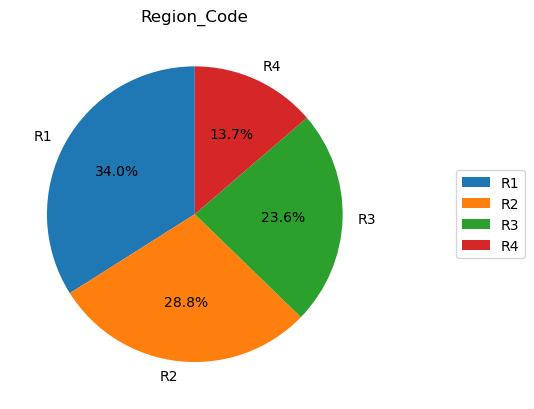

In [17]:
pie=df["Region_Code"].value_counts()
st2=pie.index
order2=pie.values 
fig, ax = plt.subplots()
ax.pie(order2, labels=st2, autopct='%1.1f%%', startangle=90)
# Add a legend
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))
# Add a title
ax.set_title("Region_Code")
# Show plot
plt.show()

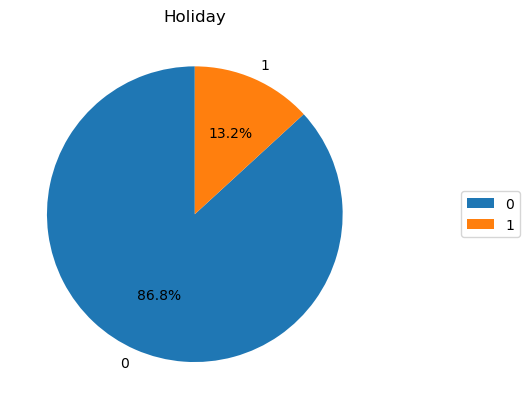

In [18]:
pie=df["Holiday"].value_counts()
st2=pie.index
order2=pie.values 
fig, ax = plt.subplots()
ax.pie(order2, labels=st2, autopct='%1.1f%%', startangle=90)
# Add a legend
ax.legend(loc='center', bbox_to_anchor=(1.3, 0.5))
# Add a title
ax.set_title("Holiday")
# Show plot
plt.show()

In [19]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70


In [20]:
#Now we will change some features values into the numeric form from the differnet datatypes
#for that we will use the mapping    
#changing for the discount
df["Discount"]=df["Discount"].map({"No":0,"Yes":1})
df["Discount"]

0         1
1         1
2         1
3         1
4         1
         ..
188335    1
188336    0
188337    0
188338    1
188339    0
Name: Discount, Length: 188340, dtype: int64

In [21]:
# similar way we do for the rest of the features
df["Store_Type"]=df["Store_Type"].map({"S1":1,"S2":2,"S3":3,"S4":4})
df["Location_Type"]=df["Location_Type"].map({"L1":1,"L2":2,"L3":3,"L4":4,"L5":5})
df["Region_Code"]=df["Region_Code"].map({"R1":1,"R2":2,"R3":3,"R4":4})
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order
0,T1000001,1,1,3,1,2018-01-01,1,1,9
1,T1000002,253,4,2,1,2018-01-01,1,1,60
2,T1000003,252,3,2,1,2018-01-01,1,1,42
3,T1000004,251,2,3,1,2018-01-01,1,1,23
4,T1000005,250,2,3,4,2018-01-01,1,1,62
...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,2,3,2,2019-05-31,1,1,51
188336,T1188337,153,4,2,1,2019-05-31,1,0,90
188337,T1188338,154,1,3,2,2019-05-31,1,0,56
188338,T1188339,155,3,1,2,2019-05-31,1,1,70


In [22]:
#now model creation
#spliting the dependent and independent variables from the dataset
x=np.array(df[["Region_Code","Store_Type","Location_Type","Holiday","Discount"]])
y=np.array(df["#Order"])

In [25]:
# here we are spliting the data set tarining and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=42)


In [26]:
print("                         *****x_train values:****")
x_train

                         *****x_train values:****


array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 4, 1, 1],
       ...,
       [4, 1, 1, 0, 1],
       [3, 1, 3, 0, 1],
       [2, 2, 4, 0, 0]], dtype=int64)

In [27]:
        print("*****y_train values:****")
        y_train

*****y_train values:****


array([54, 68,  5, ..., 51, 55, 51], dtype=int64)

In [28]:
print("           *****x_test values:****")
x_test

           *****x_test values:****


array([[1, 1, 4, 0, 0],
       [1, 4, 2, 1, 1],
       [3, 1, 1, 0, 1],
       ...,
       [2, 1, 5, 0, 0],
       [4, 2, 3, 0, 0],
       [3, 1, 1, 0, 1]], dtype=int64)

In [29]:
print("*****Y_test values:****")
y_test

*****Y_test values:****


array([ 54, 111,  59, ...,  41,  28,  90], dtype=int64)

In [35]:
#model creation
#!pip install --upgrade pip


!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 777.2 kB/s eta 0:00:00


In [43]:
import lightgbm as lgb
model=lgb.LGBMRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

y_pred

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 145021, number of used features: 5
[LightGBM] [Info] Start training from score 68.152695


array([ 50.28246073, 103.91866499,  68.09996279, ...,  43.89576282,
        39.07794444,  68.09996279])

In [37]:
y_test

array([ 54, 111,  59, ...,  41,  28,  90], dtype=int64)

In [38]:
# Testing and trainging accuracies
accuracy1=model.score(x_train,y_train)
print("The  training accuracy is ",accuracy1)
accuracy2=model.score(x_test,y_test)
print("The  testing accuracy is ",accuracy2)


The  training accuracy is  0.6160256190512118
The  testing accuracy is  0.6121113080281403


In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 362.06172782138617


In [40]:
#using decision tree model to prediction
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,max_depth=4)
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
y_pred1

array([ 51, 111,  63, ...,  51,  37,  63], dtype=int64)

In [394]:
y_test

array([ 54, 111,  59, ...,  41,  28,  90], dtype=int64)

In [395]:
print("the difference between the y_predicted and y_actural for decision algo")
y_pred1-y_test


the difference between the y_predicted and y_actural for decision algo


array([ -3,   0,   4, ...,  10,   9, -27], dtype=int64)

In [400]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error:', mse)

Mean Squared Error: 446.9775848934648
